In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
import random
'''
Autor:Daniel Tendero García
'''

In [20]:
# Función con el algoritmo de generación de una red Preferential attachment
def PA(n,m0, m):
    #Creamos la red con tamaño m0
    g = nx.path_graph(m0)
    # Lista de claves (repetidas por cada extremo)
    keyList = []
    #Añadimos a la lista de claves los primeros extremos
    for edge in g.edges():
        for element in edge:
            keyList.append(element)
    #Iteramos desde m0 hasta n
    for i in range(m0 , n ):
        #Añadimos el nodo a la red
        g.add_node(i)
        #Creamos una lista para evitar duplicados
        listRepeated = []
        j=0
        while j < m:
            #Número aleatorio para seleccionar de la lista
            r = random.randint(0, len(keyList)-1)
            #Si no hemos cogido ya ese nodo para hacer el enlace
            if r not in listRepeated:
                #Añadimos el enlace
                g.add_edge(i, keyList[r])
                #Añadimos a la lista de claves
                keyList.append(i)
                keyList.append( keyList[r])
                #Añadimos a la lista de repetidos
                listRepeated.append(r)
                j = j+1
    return g
g = PA(100,3,2)

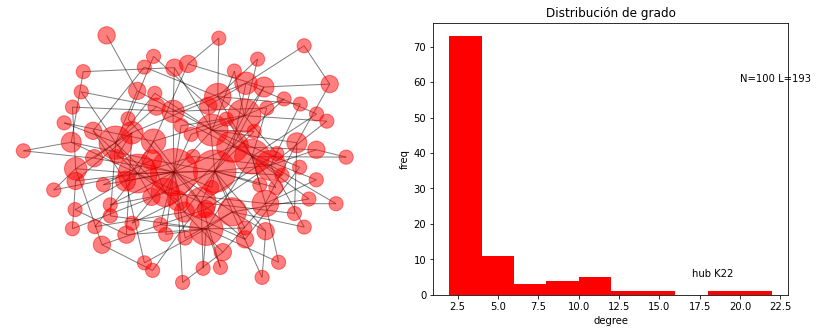

In [21]:
#Cremos la función para hacer la distribución
def write_dist(Gb, text, color):
    degree= np.array([x[1] for x in Gb.degree()])
    pos = nx.kamada_kawai_layout(Gb)
    fig, ax= plt.subplots(nrows=1,ncols=2, sharex=False, figsize=(14,5))
    plt.axes(ax[0])
    nx.draw(Gb, pos,with_labels=False, node_color=color, alpha=0.5, node_size=degree*100)
    plt.axes(ax[1])
    plt.hist(degree,density=False,color=color)
    plt.xlabel('degree')
    plt.ylabel('freq')
    plt.title(text )
    plt.text(degree.max()-5, 5, 'hub K%i' % degree.max())
    plt.text(20,60,'N=%i L=%i'%(Gb.number_of_nodes(), Gb.number_of_edges()))
    
write_dist(g, "Distribución de grado", "r")